In [1]:
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
df = pd.read_excel('DJIA Realized Volatility.xlsx',index_col='Date',parse_dates=True)


In [3]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
epochs = [25,25,25,25,25,25]
RMSE = []
Accuracy = []
scaler = MinMaxScaler()

21 lags

In [4]:
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[0]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[0], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[0])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/25
884/884 [==============================] - 10s 6ms/step - loss: 0.0994 - accuracy: 0.0011 - mean_absolute_error: 0.1767
Epoch 2/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0088 - accuracy: 0.0023 - mean_absolute_error: 0.0576
Epoch 3/25
884/884 [==============================] - 6s 7ms/step - loss: 0.0061 - accuracy: 0.0011 - mean_absolute_error: 0.0450
Epoch 4/25
884/884 [==============================] - 6s 6ms/step - loss: 0.0047 - accuracy: 0.0011 - mean_absolute_error: 0.0404
Epoch 5/25
884/884 [==============================] - 6s 6ms/step - loss: 0.0040 - accuracy: 0.0011 - mean_absolute_error: 0.0380
Epoch 6/25
884/884 [==============================] - 6s 6ms/step - loss: 0.0044 - accuracy: 0.0011 - mean_absolute_error: 0.0396
Epoch 7/25
884/884 [==============================] - 6s 6ms/step - loss: 0.0054 - accuracy: 0.0011 - mean_absolute_error: 0.0394
Epoch 8/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0033 - accura

1/1 [==============================] - 0s 31ms/step
Epoch 1/25
884/884 [==============================] - 10s 6ms/step - loss: 0.1565 - accuracy: 0.0011 - mean_absolute_error: 0.2091
Epoch 2/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0165 - accuracy: 0.0023 - mean_absolute_error: 0.0712
Epoch 3/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0097 - accuracy: 0.0011 - mean_absolute_error: 0.0516
Epoch 4/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0048 - accuracy: 0.0023 - mean_absolute_error: 0.0415
Epoch 5/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0046 - accuracy: 0.0011 - mean_absolute_error: 0.0380
Epoch 6/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0038 - accuracy: 0.0011 - mean_absolute_error: 0.0364
Epoch 7/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0044 - accuracy: 0.0011 - mean_absolute_error: 0.0371
Epoch 8/25
884/884 [=================

1/1 [==============================] - 0s 40ms/step
Epoch 1/25
884/884 [==============================] - 9s 6ms/step - loss: 0.2998 - accuracy: 0.0011 - mean_absolute_error: 0.2504
Epoch 2/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0165 - accuracy: 0.0023 - mean_absolute_error: 0.0737
Epoch 3/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0073 - accuracy: 0.0011 - mean_absolute_error: 0.0486
Epoch 4/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0074 - accuracy: 0.0011 - mean_absolute_error: 0.0482
Epoch 5/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0043 - accuracy: 0.0011 - mean_absolute_error: 0.0400
Epoch 6/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0044 - accuracy: 0.0011 - mean_absolute_error: 0.0378
Epoch 7/25
884/884 [==============================] - 5s 6ms/step - loss: 0.0062 - accuracy: 0.0011 - mean_absolute_error: 0.0412
Epoch 8/25
884/884 [==================

In [5]:
Accuracy

[49.973514404910176,
 63.45761126503531,
 39.3833952756185,
 45.06654214831814,
 51.363017014798686]

In [6]:
RMSE

[0.002109575728429595,
 0.0018614976787172121,
 0.0024368161817491913,
 0.002268921234802527,
 0.002085458661326626]

In [7]:
np.mean(RMSE)

0.00215245389700503

In [8]:
np.std(RMSE)

0.00019256633644689424

63 lags

In [9]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[1]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[1], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[1])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/25
842/842 [==============================] - 14s 11ms/step - loss: 0.8674 - accuracy: 0.0024 - mean_absolute_error: 0.4728
Epoch 2/25
842/842 [==============================] - 9s 11ms/step - loss: 0.0751 - accuracy: 0.0012 - mean_absolute_error: 0.1633
Epoch 3/25
842/842 [==============================] - 8s 10ms/step - loss: 0.0368 - accuracy: 0.0012 - mean_absolute_error: 0.1095
Epoch 4/25
842/842 [==============================] - 9s 10ms/step - loss: 0.0165 - accuracy: 0.0024 - mean_absolute_error: 0.0734
Epoch 5/25
842/842 [==============================] - 9s 11ms/step - loss: 0.0096 - accuracy: 0.0012 - mean_absolute_error: 0.0535
Epoch 6/25
842/842 [==============================] - 9s 10ms/step - loss: 0.0093 - accuracy: 0.0024 - mean_absolute_error: 0.0517
Epoch 7/25
842/842 [==============================] - 9s 10ms/step - loss: 0.0087 - accuracy: 0.0012 - mean_absolute_error: 0.0491
Epoch 8/25
842/842 [==============================] - 9s 10ms/step - loss: 0.0064 

1/1 [==============================] - 0s 29ms/step
Epoch 1/25
842/842 [==============================] - 12s 10ms/step - loss: 0.3569 - accuracy: 0.0024 - mean_absolute_error: 0.3157
Epoch 2/25
842/842 [==============================] - 8s 9ms/step - loss: 0.0341 - accuracy: 0.0012 - mean_absolute_error: 0.1124
Epoch 3/25
842/842 [==============================] - 8s 9ms/step - loss: 0.0157 - accuracy: 0.0012 - mean_absolute_error: 0.0722
Epoch 4/25
842/842 [==============================] - 8s 10ms/step - loss: 0.0087 - accuracy: 0.0012 - mean_absolute_error: 0.0553
Epoch 5/25
842/842 [==============================] - 8s 10ms/step - loss: 0.0068 - accuracy: 0.0012 - mean_absolute_error: 0.0475
Epoch 6/25
842/842 [==============================] - 8s 10ms/step - loss: 0.0054 - accuracy: 0.0012 - mean_absolute_error: 0.0432
Epoch 7/25
842/842 [==============================] - 8s 9ms/step - loss: 0.0059 - accuracy: 0.0024 - mean_absolute_error: 0.0417
Epoch 8/25
842/842 [=============

1/1 [==============================] - 0s 31ms/step
Epoch 1/25
842/842 [==============================] - 17s 12ms/step - loss: 0.5737 - accuracy: 0.0024 - mean_absolute_error: 0.4276
Epoch 2/25
842/842 [==============================] - 11s 13ms/step - loss: 0.0440 - accuracy: 0.0024 - mean_absolute_error: 0.1345
Epoch 3/25
842/842 [==============================] - 12s 14ms/step - loss: 0.0334 - accuracy: 0.0012 - mean_absolute_error: 0.1081
Epoch 4/25
842/842 [==============================] - 11s 13ms/step - loss: 0.0170 - accuracy: 0.0012 - mean_absolute_error: 0.0761
Epoch 5/25
842/842 [==============================] - 12s 14ms/step - loss: 0.0073 - accuracy: 0.0012 - mean_absolute_error: 0.0520
Epoch 6/25
842/842 [==============================] - 11s 13ms/step - loss: 0.0071 - accuracy: 0.0012 - mean_absolute_error: 0.0472
Epoch 7/25
842/842 [==============================] - 12s 14ms/step - loss: 0.0050 - accuracy: 0.0012 - mean_absolute_error: 0.0433
Epoch 8/25
842/842 [====

In [10]:
Accuracy

[7.569743781080939,
 39.73694383191613,
 45.87249786244355,
 52.3069228596811,
 58.984272886460765]

In [11]:
RMSE

[0.003665250711779325,
 0.0024753374490916057,
 0.0022140504789761443,
 0.0020778444985475953,
 0.001857568571067143]

In [12]:
np.mean(RMSE)

0.0024580103418923626

In [13]:
np.std(RMSE)

0.0006359720658394624

84 lags

In [14]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[2]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[2], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[2])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/25
821/821 [==============================] - 40s 20ms/step - loss: 0.3360 - accuracy: 0.0024 - mean_absolute_error: 0.2866
Epoch 2/25
821/821 [==============================] - 17s 21ms/step - loss: 0.0220 - accuracy: 0.0012 - mean_absolute_error: 0.0977
Epoch 3/25
821/821 [==============================] - 17s 21ms/step - loss: 0.0112 - accuracy: 0.0024 - mean_absolute_error: 0.0679
Epoch 4/25
821/821 [==============================] - 16s 19ms/step - loss: 0.0093 - accuracy: 0.0012 - mean_absolute_error: 0.0565
Epoch 5/25
821/821 [==============================] - 16s 19ms/step - loss: 0.0053 - accuracy: 0.0012 - mean_absolute_error: 0.0439
Epoch 6/25
821/821 [==============================] - 17s 20ms/step - loss: 0.0043 - accuracy: 0.0024 - mean_absolute_error: 0.0405
Epoch 7/25
821/821 [==============================] - 13s 15ms/step - loss: 0.0048 - accuracy: 0.0012 - mean_absolute_error: 0.0399
Epoch 8/25
821/821 [==============================] - 13s 15ms/step - loss: 

1/1 [==============================] - 0s 41ms/step
Epoch 1/25
821/821 [==============================] - 19s 15ms/step - loss: 0.5046 - accuracy: 0.0012 - mean_absolute_error: 0.3702
Epoch 2/25
821/821 [==============================] - 12s 14ms/step - loss: 0.0262 - accuracy: 0.0024 - mean_absolute_error: 0.0989
Epoch 3/25
821/821 [==============================] - 12s 15ms/step - loss: 0.0152 - accuracy: 0.0024 - mean_absolute_error: 0.0734
Epoch 4/25
821/821 [==============================] - 12s 14ms/step - loss: 0.0080 - accuracy: 0.0012 - mean_absolute_error: 0.0570
Epoch 5/25
821/821 [==============================] - 11s 14ms/step - loss: 0.0097 - accuracy: 0.0012 - mean_absolute_error: 0.0532
Epoch 6/25
821/821 [==============================] - 12s 14ms/step - loss: 0.0072 - accuracy: 0.0012 - mean_absolute_error: 0.0475
Epoch 7/25
821/821 [==============================] - 11s 14ms/step - loss: 0.0052 - accuracy: 0.0012 - mean_absolute_error: 0.0405
Epoch 8/25
821/821 [====

1/1 [==============================] - 0s 48ms/step
Epoch 1/25
821/821 [==============================] - 18s 14ms/step - loss: 0.7191 - accuracy: 0.0012 - mean_absolute_error: 0.4105
Epoch 2/25
821/821 [==============================] - 12s 14ms/step - loss: 0.0324 - accuracy: 0.0012 - mean_absolute_error: 0.1161
Epoch 3/25
821/821 [==============================] - 11s 14ms/step - loss: 0.0174 - accuracy: 0.0012 - mean_absolute_error: 0.0814
Epoch 4/25
821/821 [==============================] - 12s 15ms/step - loss: 0.0095 - accuracy: 0.0024 - mean_absolute_error: 0.0584
Epoch 5/25
821/821 [==============================] - 12s 15ms/step - loss: 0.0108 - accuracy: 0.0012 - mean_absolute_error: 0.0576
Epoch 6/25
821/821 [==============================] - 13s 16ms/step - loss: 0.0065 - accuracy: 0.0012 - mean_absolute_error: 0.0456
Epoch 7/25
821/821 [==============================] - 14s 17ms/step - loss: 0.0054 - accuracy: 0.0012 - mean_absolute_error: 0.0406
Epoch 8/25
821/821 [====

In [15]:
Accuracy

[29.90956073904846,
 57.93364273528301,
 53.33371962069946,
 44.86539883320687,
 42.194626339149764]

In [16]:
RMSE

[0.002745021406516971,
 0.0018703686749429423,
 0.001995557599086283,
 0.0022506831434069546,
 0.0023790332890445435]

In [17]:
np.mean(RMSE)

0.002248132822599539

In [18]:
np.std(RMSE)

0.00030677017321333494

126 lags

In [19]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[3]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[3], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[3])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/25
779/779 [==============================] - 25s 22ms/step - loss: 1.3180 - accuracy: 0.0026 - mean_absolute_error: 0.5583
Epoch 2/25
779/779 [==============================] - 21s 27ms/step - loss: 0.1249 - accuracy: 0.0026 - mean_absolute_error: 0.1629
Epoch 3/25
779/779 [==============================] - 22s 28ms/step - loss: 0.0243 - accuracy: 0.0026 - mean_absolute_error: 0.0831
Epoch 4/25
779/779 [==============================] - 21s 27ms/step - loss: 0.0201 - accuracy: 0.0013 - mean_absolute_error: 0.0748
Epoch 5/25
779/779 [==============================] - 19s 24ms/step - loss: 0.0151 - accuracy: 0.0013 - mean_absolute_error: 0.0623
Epoch 6/25
779/779 [==============================] - 18s 23ms/step - loss: 0.0064 - accuracy: 0.0013 - mean_absolute_error: 0.0484
Epoch 7/25
779/779 [==============================] - 17s 22ms/step - loss: 0.0075 - accuracy: 0.0026 - mean_absolute_error: 0.0468
Epoch 8/25
779/779 [==============================] - 17s 22ms/step - loss: 

1/1 [==============================] - 0s 36ms/step
Epoch 1/25
779/779 [==============================] - 17s 15ms/step - loss: 1.1106 - accuracy: 0.0013 - mean_absolute_error: 0.5626
Epoch 2/25
779/779 [==============================] - 12s 15ms/step - loss: 0.0754 - accuracy: 0.0013 - mean_absolute_error: 0.1754
Epoch 3/25
779/779 [==============================] - 12s 15ms/step - loss: 0.0328 - accuracy: 0.0013 - mean_absolute_error: 0.1136
Epoch 4/25
779/779 [==============================] - 12s 15ms/step - loss: 0.0216 - accuracy: 0.0013 - mean_absolute_error: 0.0917
Epoch 5/25
779/779 [==============================] - 12s 15ms/step - loss: 0.0159 - accuracy: 0.0013 - mean_absolute_error: 0.0745
Epoch 6/25
779/779 [==============================] - 12s 15ms/step - loss: 0.0090 - accuracy: 0.0013 - mean_absolute_error: 0.0599
Epoch 7/25
779/779 [==============================] - 12s 15ms/step - loss: 0.0069 - accuracy: 0.0013 - mean_absolute_error: 0.0506
Epoch 8/25
779/779 [====

1/1 [==============================] - 0s 46ms/step
Epoch 1/25
779/779 [==============================] - 25s 20ms/step - loss: 1.3010 - accuracy: 0.0026 - mean_absolute_error: 0.4851
Epoch 2/25
779/779 [==============================] - 16s 20ms/step - loss: 0.0643 - accuracy: 0.0013 - mean_absolute_error: 0.1569
Epoch 3/25
779/779 [==============================] - 16s 20ms/step - loss: 0.1170 - accuracy: 0.0026 - mean_absolute_error: 0.1615
Epoch 4/25
779/779 [==============================] - 16s 21ms/step - loss: 0.0499 - accuracy: 0.0013 - mean_absolute_error: 0.0962
Epoch 5/25
779/779 [==============================] - 16s 20ms/step - loss: 0.0136 - accuracy: 0.0013 - mean_absolute_error: 0.0588
Epoch 6/25
779/779 [==============================] - 16s 21ms/step - loss: 0.0080 - accuracy: 0.0013 - mean_absolute_error: 0.0495
Epoch 7/25
779/779 [==============================] - 16s 21ms/step - loss: 0.0066 - accuracy: 0.0013 - mean_absolute_error: 0.0458
Epoch 8/25
779/779 [====

In [20]:
Accuracy

[59.50981880546902,
 49.83028368078873,
 49.888128608302516,
 45.53092567280746,
 63.50254318429549]

In [21]:
RMSE

[0.001849153499212408,
 0.0021363417392261633,
 0.0021374574500445985,
 0.0022627928247949476,
 0.0018632374819011258]

In [22]:
np.mean(RMSE)

0.0020497965990358487

In [23]:
np.std(RMSE)

0.00016468384011226293

189 lags

In [24]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[4]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[4], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[4])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/25
716/716 [==============================] - 26s 25ms/step - loss: 1.3119 - accuracy: 0.0014 - mean_absolute_error: 0.6141
Epoch 2/25
716/716 [==============================] - 17s 23ms/step - loss: 0.1533 - accuracy: 0.0028 - mean_absolute_error: 0.2193
Epoch 3/25
716/716 [==============================] - 15s 21ms/step - loss: 0.0615 - accuracy: 0.0028 - mean_absolute_error: 0.1465
Epoch 4/25
716/716 [==============================] - 14s 19ms/step - loss: 0.0240 - accuracy: 0.0028 - mean_absolute_error: 0.0981
Epoch 5/25
716/716 [==============================] - 8s 11ms/step - loss: 0.0205 - accuracy: 0.0028 - mean_absolute_error: 0.0865
Epoch 6/25
716/716 [==============================] - 9s 12ms/step - loss: 0.0208 - accuracy: 0.0014 - mean_absolute_error: 0.0756
Epoch 7/25
716/716 [==============================] - 10s 14ms/step - loss: 0.0159 - accuracy: 0.0028 - mean_absolute_error: 0.0699
Epoch 8/25
716/716 [==============================] - 10s 14ms/step - loss: 0.

1/1 [==============================] - 0s 45ms/step
Epoch 1/25
716/716 [==============================] - 22s 19ms/step - loss: 1.4809 - accuracy: 0.0014 - mean_absolute_error: 0.6304
Epoch 2/25
716/716 [==============================] - 11s 15ms/step - loss: 0.1139 - accuracy: 0.0014 - mean_absolute_error: 0.1904
Epoch 3/25
716/716 [==============================] - 10s 14ms/step - loss: 0.0491 - accuracy: 0.0014 - mean_absolute_error: 0.1177
Epoch 4/25
716/716 [==============================] - 9s 13ms/step - loss: 0.0370 - accuracy: 0.0028 - mean_absolute_error: 0.1037
Epoch 5/25
716/716 [==============================] - 10s 14ms/step - loss: 0.0218 - accuracy: 0.0014 - mean_absolute_error: 0.0759
Epoch 6/25
716/716 [==============================] - 10s 14ms/step - loss: 0.0131 - accuracy: 0.0014 - mean_absolute_error: 0.0619
Epoch 7/25
716/716 [==============================] - 10s 14ms/step - loss: 0.0096 - accuracy: 0.0014 - mean_absolute_error: 0.0537
Epoch 8/25
716/716 [=====

1/1 [==============================] - 0s 25ms/step
Epoch 1/25
716/716 [==============================] - 15s 15ms/step - loss: 1.3447 - accuracy: 0.0014 - mean_absolute_error: 0.5988
Epoch 2/25
716/716 [==============================] - 11s 15ms/step - loss: 0.1428 - accuracy: 0.0014 - mean_absolute_error: 0.2383
Epoch 3/25
716/716 [==============================] - 10s 15ms/step - loss: 0.0382 - accuracy: 0.0028 - mean_absolute_error: 0.1390
Epoch 4/25
716/716 [==============================] - 11s 15ms/step - loss: 0.0321 - accuracy: 0.0028 - mean_absolute_error: 0.1158
Epoch 5/25
716/716 [==============================] - 11s 15ms/step - loss: 0.0254 - accuracy: 0.0028 - mean_absolute_error: 0.0992
Epoch 6/25
716/716 [==============================] - 11s 15ms/step - loss: 0.0135 - accuracy: 0.0014 - mean_absolute_error: 0.0731
Epoch 7/25
716/716 [==============================] - 11s 15ms/step - loss: 0.0103 - accuracy: 0.0014 - mean_absolute_error: 0.0643
Epoch 8/25
716/716 [====

1/1 [==============================] - 0s 24ms/step


In [25]:
Accuracy

[43.8778395384144,
 35.3193040545857,
 56.22003971254661,
 37.03768649673128,
 45.6016140627138]

In [26]:
RMSE

[0.0023151265223847976,
 0.002567062576887092,
 0.001992996860911862,
 0.002514761345253503,
 0.0022177208195211925]

In [27]:
np.mean(RMSE)

0.0023215336249916897

In [28]:
np.std(RMSE)

0.00020802690835175497

252 lags

In [29]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[5]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[5], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[5])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/25
653/653 [==============================] - 13s 13ms/step - loss: 1.1290 - accuracy: 0.0015 - mean_absolute_error: 0.5150
Epoch 2/25
653/653 [==============================] - 10s 15ms/step - loss: 0.0682 - accuracy: 0.0015 - mean_absolute_error: 0.1550
Epoch 3/25
653/653 [==============================] - 10s 15ms/step - loss: 0.0323 - accuracy: 0.0031 - mean_absolute_error: 0.1106
Epoch 4/25
653/653 [==============================] - 10s 15ms/step - loss: 0.0201 - accuracy: 0.0015 - mean_absolute_error: 0.0835
Epoch 5/25
653/653 [==============================] - 10s 16ms/step - loss: 0.0118 - accuracy: 0.0015 - mean_absolute_error: 0.0663
Epoch 6/25
653/653 [==============================] - 10s 16ms/step - loss: 0.0088 - accuracy: 0.0031 - mean_absolute_error: 0.0610
Epoch 7/25
653/653 [==============================] - 10s 16ms/step - loss: 0.0070 - accuracy: 0.0031 - mean_absolute_error: 0.0535
Epoch 8/25
653/653 [==============================] - 10s 16ms/step - loss: 

1/1 [==============================] - 0s 33ms/step
Epoch 1/25
653/653 [==============================] - 17s 17ms/step - loss: 5.1551 - accuracy: 0.0015 - mean_absolute_error: 1.1323
Epoch 2/25
653/653 [==============================] - 10s 15ms/step - loss: 0.3191 - accuracy: 0.0015 - mean_absolute_error: 0.3653
Epoch 3/25
653/653 [==============================] - 11s 17ms/step - loss: 0.1273 - accuracy: 0.0015 - mean_absolute_error: 0.2385
Epoch 4/25
653/653 [==============================] - 11s 17ms/step - loss: 0.0832 - accuracy: 0.0031 - mean_absolute_error: 0.1830
Epoch 5/25
653/653 [==============================] - 11s 17ms/step - loss: 0.0401 - accuracy: 0.0015 - mean_absolute_error: 0.1312
Epoch 6/25
653/653 [==============================] - 11s 16ms/step - loss: 0.0318 - accuracy: 0.0015 - mean_absolute_error: 0.1087
Epoch 7/25
653/653 [==============================] - 10s 15ms/step - loss: 0.0255 - accuracy: 0.0015 - mean_absolute_error: 0.0968
Epoch 8/25
653/653 [====

1/1 [==============================] - 0s 26ms/step
Epoch 1/25
653/653 [==============================] - 15s 17ms/step - loss: 2.2239 - accuracy: 0.0031 - mean_absolute_error: 0.7456
Epoch 2/25
653/653 [==============================] - 10s 16ms/step - loss: 0.1615 - accuracy: 0.0031 - mean_absolute_error: 0.2437
Epoch 3/25
653/653 [==============================] - 10s 15ms/step - loss: 0.0474 - accuracy: 0.0015 - mean_absolute_error: 0.1407
Epoch 4/25
653/653 [==============================] - 10s 15ms/step - loss: 0.0305 - accuracy: 0.0015 - mean_absolute_error: 0.1067
Epoch 5/25
653/653 [==============================] - 10s 15ms/step - loss: 0.0206 - accuracy: 0.0015 - mean_absolute_error: 0.0911
Epoch 6/25
653/653 [==============================] - 10s 15ms/step - loss: 0.0136 - accuracy: 0.0015 - mean_absolute_error: 0.0740
Epoch 7/25
653/653 [==============================] - 11s 16ms/step - loss: 0.0116 - accuracy: 0.0015 - mean_absolute_error: 0.0675
Epoch 8/25
653/653 [====

In [30]:
Accuracy

[44.578384903783785,
 42.87257595257912,
 27.248398330549108,
 31.758680806248265,
 40.21644599327261]

In [31]:
RMSE

[0.0022836219318724247,
 0.002380024518877416,
 0.002823070487802573,
 0.002740294651961245,
 0.0024174402082709667]

In [32]:
np.mean(RMSE)

0.002528890359756925

In [33]:
np.std(RMSE)

0.00021258998050863263

126 lags was chosen

In [4]:
Accuracy=[]
RMSE=[]

In [51]:
train = df.iloc[:1005]
test = df.iloc[1005:]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:1005]
test = df["Realised"].iloc[1005:]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 4
n_input = n_inputs[3]
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
model = Sequential()
model.add(TCN(kernel_size=3, dilations=dilations[3], nb_stacks=1,padding='causal',
              dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=epochs[3])
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(scaled_test_input)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-(np.sum(np.sqrt((test-true_predictions)**2)/test)/len(test)))*100)

Epoch 1/25
879/879 [==============================] - 20s 17ms/step - loss: 1.3682 - accuracy: 0.0011 - mean_absolute_error: 0.5762
Epoch 2/25
879/879 [==============================] - 12s 13ms/step - loss: 0.0945 - accuracy: 0.0023 - mean_absolute_error: 0.1802
Epoch 3/25
879/879 [==============================] - 11s 12ms/step - loss: 0.0447 - accuracy: 0.0011 - mean_absolute_error: 0.1204
Epoch 4/25
879/879 [==============================] - 15s 17ms/step - loss: 0.0193 - accuracy: 0.0011 - mean_absolute_error: 0.0811
Epoch 5/25
879/879 [==============================] - 12s 13ms/step - loss: 0.0102 - accuracy: 0.0023 - mean_absolute_error: 0.0614
Epoch 6/25
879/879 [==============================] - 15s 17ms/step - loss: 0.0098 - accuracy: 0.0011 - mean_absolute_error: 0.0558
Epoch 7/25
879/879 [==============================] - 15s 17ms/step - loss: 0.0162 - accuracy: 0.0023 - mean_absolute_error: 0.0641
Epoch 8/25
879/879 [==============================] - 14s 16ms/step - loss: 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


In [55]:
Accuracy

[74.10488860533687,
 72.12568531734948,
 66.53529692571341,
 70.45974287955259,
 71.25825850760863,
 71.22684841656115,
 73.15297272148023,
 58.58653242831831,
 72.03519097562541,
 67.75223823690362,
 72.85378579355772,
 71.79301953794172,
 65.39907526239264,
 64.65999169688475,
 72.47899562848907]

In [53]:
RMSE

[0.002763400556002305,
 0.002696628774121736,
 0.002861670968609788,
 0.0027288321457677495,
 0.0026049670251302903,
 0.002754318559569988,
 0.002532872267483759,
 0.0031676781826184075,
 0.0031490203572858955,
 0.0033118877946279163,
 0.0026507888645663814,
 0.0030379343387079575,
 0.0028232933305598665,
 0.0029807074478799085,
 0.0026887090874313994]

Text(0, 0.5, 'DJIA Realized Volatility')

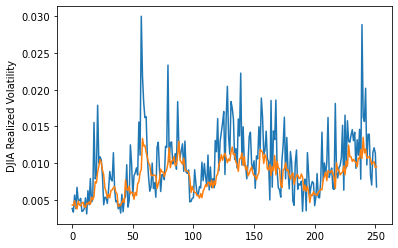

In [8]:
plt.plot(range(252), test)
plt.plot(range(252), true_predictions) 
plt.ylabel("DJIA Realized Volatility")

In [56]:
print("mean: %s" %(round(np.mean(Accuracy),2))+"%")

mean: 69.63%


In [57]:
print("stdv: %s" %(round(np.std(Accuracy),2))+"%")

stdv: 4.09%


In [58]:
Accuracy_CI_95_lower_bound=np.mean(Accuracy)-2*np.std(Accuracy)
Accuracy_CI_95_upper_bound=np.mean(Accuracy)+2*np.std(Accuracy)
print("95 percent CI lower bound: %s" %round(Accuracy_CI_95_lower_bound,2)+"%")
print("95 percent CI upper bound: %s" %round(Accuracy_CI_95_upper_bound,2)+"%")

95 percent CI lower bound: 61.44%
95 percent CI upper bound: 77.81%


In [59]:
Accuracy_CI_99_lower_bound=np.mean(Accuracy)-3*np.std(Accuracy)
Accuracy_CI_99_upper_bound=np.mean(Accuracy)+3*np.std(Accuracy)
print("99.7 percent CI lower bound: %s" %round(Accuracy_CI_99_lower_bound,2)+"%")
print("99.7 percent CI upper bound: %s" %round(Accuracy_CI_99_upper_bound,2)+"%")

99.7 percent CI lower bound: 57.35%
99.7 percent CI upper bound: 81.9%


In [60]:
RMSE

[0.002763400556002305,
 0.002696628774121736,
 0.002861670968609788,
 0.0027288321457677495,
 0.0026049670251302903,
 0.002754318559569988,
 0.002532872267483759,
 0.0031676781826184075,
 0.0031490203572858955,
 0.0033118877946279163,
 0.0026507888645663814,
 0.0030379343387079575,
 0.0028232933305598665,
 0.0029807074478799085,
 0.0026887090874313994]

In [61]:
print("mean: %s" %(round(np.mean(RMSE),5)*100)+"%")

mean: 0.28500000000000003%


In [62]:
print("stdv: %s" %(round(np.std(RMSE),5)*100)+"%")

stdv: 0.022000000000000002%


In [63]:
RMSE_CI_95_lower_bound=np.mean(RMSE)-2*np.std(RMSE)
RMSE_CI_95_upper_bound=np.mean(RMSE)+2*np.std(RMSE)
print("95 percent CI lower bound: %s" %(round(RMSE_CI_95_lower_bound,5)*100)+"%")
print("95 percent CI upper bound: %s" %(round(RMSE_CI_95_upper_bound,5)*100)+"%")

95 percent CI lower bound: 0.241%
95 percent CI upper bound: 0.329%


In [64]:
RMSE_CI_99_lower_bound=np.mean(RMSE)-3*np.std(RMSE)
RMSE_CI_99_upper_bound=np.mean(RMSE)+3*np.std(RMSE)
print("99.7 percent CI lower bound: %s" %(round(RMSE_CI_99_lower_bound,5)*100)+"%")
print("99.7 percent CI upper bound: %s" %(round(RMSE_CI_99_upper_bound,5)*100)+"%")

99.7 percent CI lower bound: 0.218%
99.7 percent CI upper bound: 0.35200000000000004%
